In [0]:
# Use the Relative Strengh Index (RSI) to determine if a stock is being overbought 

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
#Get the stock quote
df = web.DataReader('FB', data_source='yahoo', start='2019-05-20', end='2020-05-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,184.229996,181.369995,181.880005,182.720001,10352000,182.720001
2019-05-21,185.699997,183.889999,184.570007,184.820007,7502800,184.820007
2019-05-22,186.740005,183.610001,184.729996,185.320007,9213800,185.320007
2019-05-23,183.899994,179.669998,182.419998,180.869995,12768800,180.869995
2019-05-24,183.630005,180.830002,182.330002,181.059998,8807700,181.059998
...,...,...,...,...,...,...
2020-05-14,206.929993,200.690002,202.559998,206.809998,17178900,206.809998
2020-05-15,211.339996,204.119995,205.270004,210.880005,19383200,210.880005
2020-05-18,214.639999,210.940002,212.149994,213.190002,20167400,213.190002


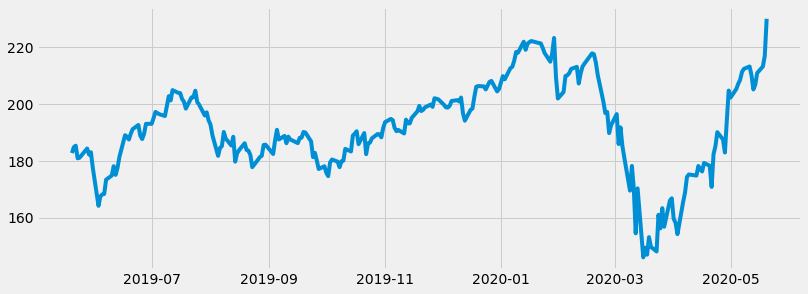

In [0]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Adj Close'])
plt.show()

In [0]:
# Prepare the data to calculate RSI

# Get the difference in price from previous day
delta = df['Adj Close'].diff(1)
delta

Date
2019-05-20          NaN
2019-05-21     2.100006
2019-05-22     0.500000
2019-05-23    -4.450012
2019-05-24     0.190002
                ...    
2020-05-14     1.709991
2020-05-15     4.070007
2020-05-18     2.309998
2020-05-19     3.690002
2020-05-20    13.089996
Name: Adj Close, Length: 254, dtype: float64

In [0]:
delta = delta.dropna()
delta

Date
2019-05-21     2.100006
2019-05-22     0.500000
2019-05-23    -4.450012
2019-05-24     0.190002
2019-05-28     3.250000
                ...    
2020-05-14     1.709991
2020-05-15     4.070007
2020-05-18     2.309998
2020-05-19     3.690002
2020-05-20    13.089996
Name: Adj Close, Length: 253, dtype: float64

In [0]:
# Get the positive gains (up) and negative (down)
up = delta.copy()
down = delta.copy()

In [0]:
up[up<0] = 0
down[down>0] = 0

In [0]:
up

Date
2019-05-21     2.100006
2019-05-22     0.500000
2019-05-23     0.000000
2019-05-24     0.190002
2019-05-28     3.250000
                ...    
2020-05-14     1.709991
2020-05-15     4.070007
2020-05-18     2.309998
2020-05-19     3.690002
2020-05-20    13.089996
Name: Adj Close, Length: 253, dtype: float64

In [0]:
down

Date
2019-05-21    0.000000
2019-05-22    0.000000
2019-05-23   -4.450012
2019-05-24    0.000000
2019-05-28    0.000000
                ...   
2020-05-14    0.000000
2020-05-15    0.000000
2020-05-18    0.000000
2020-05-19    0.000000
2020-05-20    0.000000
Name: Adj Close, Length: 253, dtype: float64

In [0]:
# Get the time period
period = 14

# Calculate the average gain and average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [0]:
# Calculate the RSI 

# Calculate the relative strengh (RS)

rs = AVG_Gain / AVG_Loss

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + rs))

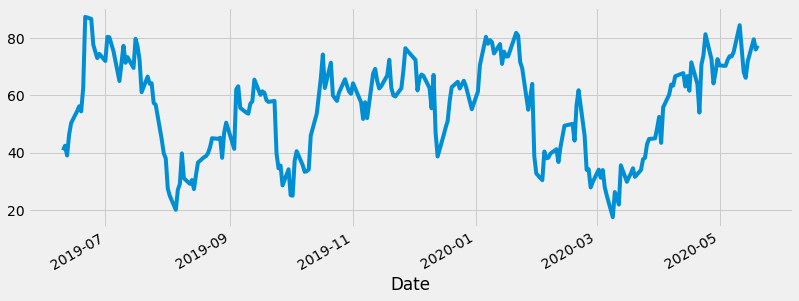

In [0]:
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [0]:
# Putting it all together
new_df = pd.DataFrame()
new_df['Adj Close'] = df ['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
Date,,
2019-05-20,182.720001,NaN
2019-05-21,184.820007,NaN
2019-05-22,185.320007,NaN
2019-05-23,180.869995,NaN
2019-05-24,181.059998,NaN
...,...,...
2020-05-14,206.809998,66.065257
2020-05-15,210.880005,71.809716
2020-05-18,213.190002,79.501181


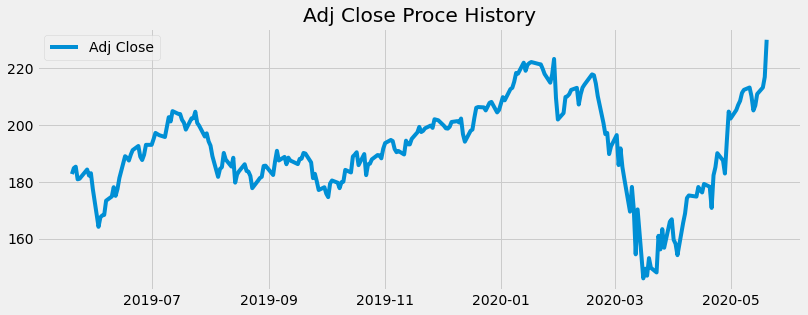

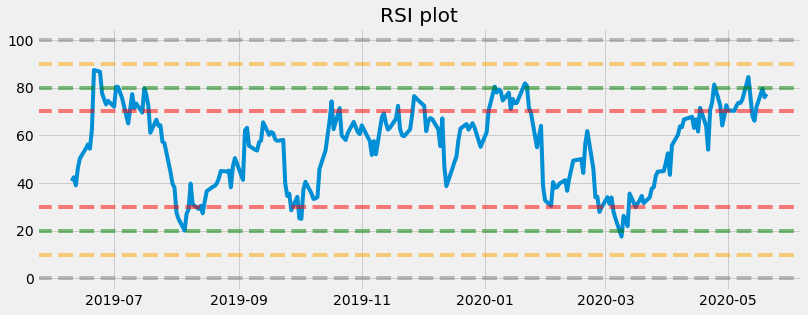

In [0]:
# Visualize the adj close price and rsi

#Plot the 
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj Close Proce History')
plt.legend(new_df.columns.values, loc='upper left')
plt.show()

# Plot the corresponding RSI values
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(10, linestyle='--', alpha=0.5, color='orange')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(80, linestyle='--', alpha=0.5, color='green')
plt.axhline(90, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.show()